In [14]:
import pandas as pd
import numpy as np
import scipy
import json
import os.path
import matplotlib.pyplot as plt
import scipy.stats as stats

In [18]:
file_path = '/Users/glrz/Desktop/Thesis/src/log/DeepSAD/cancer_test/'

# simulation of proportion of semi data split

In [19]:
simulation = 'method 3 proportion unlabeled labeled/'

In [20]:
experiments = ['5_per_labeled_0_unlabeled_method_3','10_per_labeled_0_unlabeled_method_3','25_per_labeled_0_unlabeled_method_3','25_per_labeled_75_unlabeled_method_3','100_per_labeled_0_unlabeled_method_3']

In [21]:
#all data train, test and validation
df_auc_proportion = pd.DataFrame(index=np.arange(10))
for i in range(len(experiments)):
    exact_path = file_path + simulation + experiments[i] + '/results.json'
    file1 = open(exact_path, 'r')
    Lines = file1.readlines()
    arr = Lines[0].split('}')
    dict_auc = {'train_auc_' + experiments[i]:[],
            'validation_auc_' + experiments[i]:[],
            'test_auc_' + experiments[i]:[]
            }
    for line in arr:
        split_lines = line.split(', ')
        for sl in split_lines:
            if 'train_auc' in sl:
                dict_auc['train_auc_' + experiments[i]].append(float(sl.split(': ')[1]))
            if 'validation_auc' in sl:
                dict_auc['validation_auc_' + experiments[i]].append(float(sl.split(': ')[1]))
            if 'test_auc' in sl:
                dict_auc['test_auc_' + experiments[i]].append(float(sl.split(': ')[1]))            
    file1.close()
    df_auc = pd.DataFrame(dict_auc)
    df_auc_proportion = df_auc_proportion.join(df_auc)


In [22]:
#df_auc_proportion.mean(axis=0)
df_auc_proportion.std(axis=0)

train_auc_5_per_labeled_0_unlabeled_method_3           0.005354
validation_auc_5_per_labeled_0_unlabeled_method_3      0.002478
test_auc_5_per_labeled_0_unlabeled_method_3            0.002832
train_auc_10_per_labeled_0_unlabeled_method_3          0.002819
validation_auc_10_per_labeled_0_unlabeled_method_3     0.002164
test_auc_10_per_labeled_0_unlabeled_method_3           0.002465
train_auc_25_per_labeled_0_unlabeled_method_3          0.002846
validation_auc_25_per_labeled_0_unlabeled_method_3     0.002072
test_auc_25_per_labeled_0_unlabeled_method_3           0.002738
train_auc_25_per_labeled_75_unlabeled_method_3         0.001563
validation_auc_25_per_labeled_75_unlabeled_method_3    0.001363
test_auc_25_per_labeled_75_unlabeled_method_3          0.001423
train_auc_100_per_labeled_0_unlabeled_method_3         0.000331
validation_auc_100_per_labeled_0_unlabeled_method_3    0.001661
test_auc_100_per_labeled_0_unlabeled_method_3          0.001351
dtype: float64

In [23]:
# only test results
df_auc_proportion_test = pd.DataFrame(index=np.arange(10))
for i in range(len(experiments)):
    exact_path = file_path + simulation + experiments[i] + '/results.json'
    file1 = open(exact_path, 'r')
    Lines = file1.readlines()
    arr = Lines[0].split('}')
    dict_auc = {
            'validation_auc_' + experiments[i]:[]
            }
    for line in arr:
        split_lines = line.split(', ')
        for sl in split_lines:
            if 'validation_auc' in sl:
                dict_auc['validation_auc_' + experiments[i]].append(float(sl.split(': ')[1]))         
    file1.close()
    df_auc = pd.DataFrame(dict_auc)
    df_auc_proportion_test = df_auc_proportion_test.join(df_auc)
df_auc_proportion_test

,validation_auc_5_per_labeled_0_unlabeled_method_3,validation_auc_10_per_labeled_0_unlabeled_method_3,validation_auc_25_per_labeled_0_unlabeled_method_3,validation_auc_25_per_labeled_75_unlabeled_method_3,validation_auc_100_per_labeled_0_unlabeled_method_3
0,0.862569,0.866920,0.882306,0.881503,0.884935
1,0.865015,0.872005,0.876936,0.879881,0.888171
2,0.860698,0.871004,0.878762,0.881390,0.889293
3,0.862189,0.869830,0.876874,0.882307,0.886846
4,0.869711,0.871890,0.877661,0.883690,0.889447
5,0.863988,0.868263,0.878868,0.883250,0.886964
6,0.863233,0.870771,0.879246,0.881314,0.886918
7,0.861892,0.866745,0.878998,0.879357,0.885059
8,0.863142,0.872484,0.882952,0.882376,0.889057
9,0.864665,0.867978,0.877823,0.882376,0.886147


{'whiskers': [<matplotlib.lines.Line2D at 0x1376e70d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1376e7610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1375fc2e0>,
 'medians': [<matplotlib.lines.Line2D at 0x1376e7970>,
 'fliers': [<matplotlib.lines.Line2D at 0x1376e7c10>,
 'means': []}

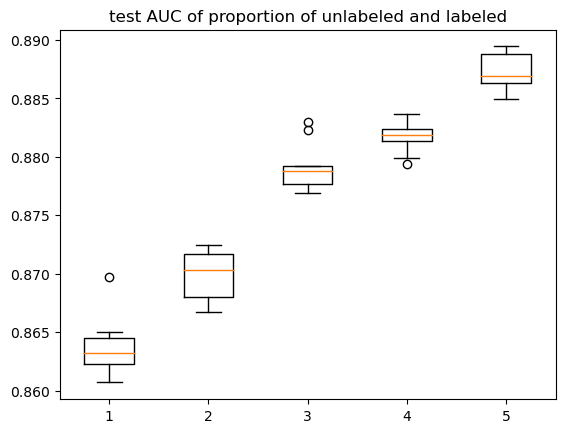

In [57]:
fig1, ax1 = plt.subplots()
ax1.set_title('Test AUC of proportion of unlabeled and labeled')
ax1.boxplot(df_auc_proportion_test)

In [31]:
#Wilcoxon signed-rank tests (Wilcoxon, 1945) applied to the first and second best performing method 
#to indicate statistically significant (α = 0.05) differences in performance

 

group2 = df_auc_proportion_test['validation_auc_100_per_labeled_0_unlabeled_method_3']
group3 = df_auc_proportion_test['validation_auc_25_per_labeled_75_unlabeled_method_3']
group4 = df_auc_proportion_test['validation_auc_25_per_labeled_0_unlabeled_method_3']
group5 = df_auc_proportion_test['validation_auc_10_per_labeled_0_unlabeled_method_3']
group6 = df_auc_proportion_test['validation_auc_5_per_labeled_0_unlabeled_method_3']
 
# conduct the Wilcoxon-Signed Rank Test
print(stats.wilcoxon(group2, group3))
print(stats.wilcoxon(group3, group4))
print(stats.wilcoxon(group4, group5))
print(stats.wilcoxon(group2, group3))

WilcoxonResult(statistic=0.0, pvalue=0.001953125)
WilcoxonResult(statistic=5.0, pvalue=0.01953125)
WilcoxonResult(statistic=0.0, pvalue=0.001953125)
WilcoxonResult(statistic=0.0, pvalue=0.001953125)


# simulation of active samples selection

In [37]:
simulation = 'k means experiment/'
experiments = ['1k_points_random_method_1','1k_points_by_5_k_means_method_2','1k_points_by_10_k_means_method_2','1k_points_by_20_k_means_method_2']
#['10k_points_random_method_1','10k_points_by_5_k_means_method_2','10k_points_by_10_k_means_method_2','10k_points_by_20_k_means_method_2']

In [38]:
#all data train, test and validation
df_auc_active = pd.DataFrame(index=np.arange(10))
for i in range(len(experiments)):
    exact_path = file_path + simulation + experiments[i] + '/results.json'
    file1 = open(exact_path, 'r')
    Lines = file1.readlines()
    arr = Lines[0].split('}')
    dict_auc = {'train_auc_' + experiments[i]:[],
            'validation_auc_' + experiments[i]:[],
            'test_auc_' + experiments[i]:[]
            }
    for line in arr:
        split_lines = line.split(', ')
        for sl in split_lines:
            if 'train_auc' in sl:
                dict_auc['train_auc_' + experiments[i]].append(float(sl.split(': ')[1]))
            if 'validation_auc' in sl:
                dict_auc['validation_auc_' + experiments[i]].append(float(sl.split(': ')[1]))
            if 'test_auc' in sl:
                dict_auc['test_auc_' + experiments[i]].append(float(sl.split(': ')[1]))            
    file1.close()
    df_auc = pd.DataFrame(dict_auc)
    df_auc_active = df_auc_active.join(df_auc)

In [39]:
df_auc_active.mean(axis=0)

train_auc_1k_points_random_method_1                0.764225
validation_auc_1k_points_random_method_1           0.715945
test_auc_1k_points_random_method_1                 0.722646
train_auc_1k_points_by_5_k_means_method_2          0.768745
validation_auc_1k_points_by_5_k_means_method_2     0.736073
test_auc_1k_points_by_5_k_means_method_2           0.742540
train_auc_1k_points_by_10_k_means_method_2         0.781892
validation_auc_1k_points_by_10_k_means_method_2    0.729921
test_auc_1k_points_by_10_k_means_method_2          0.735813
train_auc_1k_points_by_20_k_means_method_2         0.786225
validation_auc_1k_points_by_20_k_means_method_2    0.738187
test_auc_1k_points_by_20_k_means_method_2          0.740396
dtype: float64

In [40]:
df_auc_active.std(axis=0)

train_auc_1k_points_random_method_1                0.051087
validation_auc_1k_points_random_method_1           0.013429
test_auc_1k_points_random_method_1                 0.013213
train_auc_1k_points_by_5_k_means_method_2          0.055008
validation_auc_1k_points_by_5_k_means_method_2     0.039905
test_auc_1k_points_by_5_k_means_method_2           0.042299
train_auc_1k_points_by_10_k_means_method_2         0.049136
validation_auc_1k_points_by_10_k_means_method_2    0.034419
test_auc_1k_points_by_10_k_means_method_2          0.038880
train_auc_1k_points_by_20_k_means_method_2         0.063971
validation_auc_1k_points_by_20_k_means_method_2    0.036637
test_auc_1k_points_by_20_k_means_method_2          0.040555
dtype: float64

In [42]:
#group2 = df_auc_proportion_test['train_auc_80_per_labeled_baseline_10_unlabeled_random_method_5']
#group3 = df_auc_proportion_test['train_auc_80_per_labeled_baseline_10_unlabeled_isolation_method_4']
group4 = df_auc_active['test_auc_1k_points_by_20_k_means_method_2']
group5 = df_auc_active['test_auc_1k_points_random_method_1']
group6 = df_auc_active['test_auc_1k_points_by_5_k_means_method_2']
group7 = df_auc_active['test_auc_1k_points_by_10_k_means_method_2']

# conduct the Wilcoxon-Signed Rank Test
#print(stats.wilcoxon(group2, group3))
print(stats.wilcoxon(group4, group5))
print(stats.wilcoxon(group6, group5))
print(stats.wilcoxon(group5, group7))

WilcoxonResult(statistic=15.0, pvalue=0.232421875)
WilcoxonResult(statistic=16.0, pvalue=0.275390625)
WilcoxonResult(statistic=15.0, pvalue=0.232421875)


In [18]:
# only test results
df_auc_active_test_2 = pd.DataFrame(index=np.arange(10))
for i in range(len(experiments)):
    exact_path = file_path + simulation + experiments[i] + '/results.json'
    file1 = open(exact_path, 'r')
    Lines = file1.readlines()
    arr = Lines[0].split('}')
    dict_auc = {
            'test_auc_' + experiments[i]:[]
            }
    for line in arr:
        split_lines = line.split(', ')
        for sl in split_lines:
            if 'test_auc' in sl:
                dict_auc['test_auc_' + experiments[i]].append(float(sl.split(': ')[1]))         
    file1.close()
    df_auc = pd.DataFrame(dict_auc)
    df_auc_active_test_2 = df_auc_active_test_2.join(df_auc)
df_auc_active_test_2

,test_auc_1k_points_random_method_1,test_auc_1k_points_by_5_k_means_method_2,test_auc_1k_points_by_10_k_means_method_2,test_auc_1k_points_by_20_k_means_method_2
0,0.711302,0.797596,0.772837,0.714623
1,0.725165,0.733256,0.740494,0.768853
2,0.743433,0.768533,0.763567,0.772454
3,0.708497,0.737190,0.709283,0.739589
4,0.723461,0.773688,0.732466,0.716192
5,0.711914,0.796737,0.776803,0.695756
6,0.739583,0.701340,0.776908,0.781702
7,0.705981,0.747310,0.703962,0.799341
8,0.733730,0.683745,0.724894,0.742406
9,0.723391,0.686003,0.656918,0.673039


In [20]:
df_auc_active_test_2.mean()

test_auc_1k_points_random_method_1           0.722646
test_auc_1k_points_by_5_k_means_method_2     0.742540
test_auc_1k_points_by_10_k_means_method_2    0.735813
test_auc_1k_points_by_20_k_means_method_2    0.740396
dtype: float64

In [22]:
df_auc_active_test_2.describe()

,test_auc_1k_points_random_method_1,test_auc_1k_points_by_5_k_means_method_2,test_auc_1k_points_by_10_k_means_method_2,test_auc_1k_points_by_20_k_means_method_2
count,10.000000,10.000000,10.000000,10.000000
mean,0.722646,0.742540,0.735813,0.740396
std,0.013213,0.042299,0.038880,0.040555
min,0.705981,0.683745,0.656918,0.673039
25%,0.711455,0.709319,0.713186,0.715015
50%,0.723426,0.742250,0.736480,0.740998
75%,0.731589,0.772399,0.770519,0.771554
max,0.743433,0.797596,0.776908,0.799341


In [25]:
# Welch's t-test unequal var - t test between random to 5 means (best result)
from scipy import stats
stats.shapiro(df_auc_active_test_2[['test_auc_1k_points_random_method_1','test_auc_1k_points_by_5_k_means_method_2']])



ShapiroResult(statistic=0.9442583918571472, pvalue=0.28820186853408813)

In [27]:
# t test
from scipy.stats import ttest_ind
ttest_ind(df_auc_active_test_2['test_auc_1k_points_random_method_1'],df_auc_proportion_test_2['test_auc_1k_points_by_5_k_means_method_2'])

Ttest_indResult(statistic=-1.4196553541065444, pvalue=0.172795406265848)

{'whiskers': [<matplotlib.lines.Line2D at 0x12e84a220>,
 'caps': [<matplotlib.lines.Line2D at 0x12e84a640>,
 'boxes': [<matplotlib.lines.Line2D at 0x12e83af40>,
 'medians': [<matplotlib.lines.Line2D at 0x12e84ab80>,
 'fliers': [<matplotlib.lines.Line2D at 0x12e84ae20>,
 'means': []}

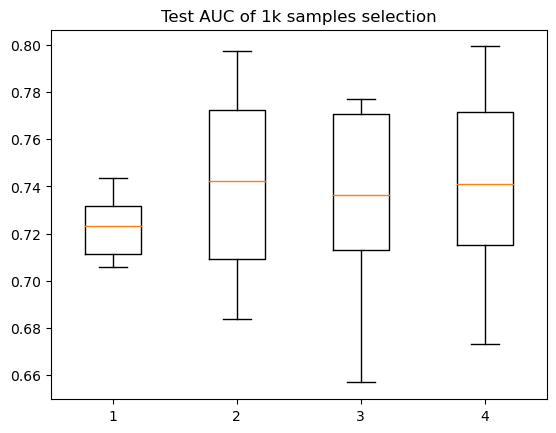

In [19]:
fig2, ax2 = plt.subplots()
ax2.set_title('Test AUC of 1k samples selection')
ax2.boxplot(df_auc_active_test_2)

In [ ]:
# unlabeled samples drop method - 80% labeled, choose to include 50 of the unlabeled%

In [7]:
simulation = 'unlabeled data drop method little data/'
experiments = ['80_per_labeled_baseline_10_unlabeled_random_method_5','80_per_labeled_baseline_10_unlabeled_isolation_method_4']

In [12]:
#all data train, test and validation
df_auc_iso = pd.DataFrame(index=np.arange(3))
for i in range(len(experiments)):
    #exact_path = file_path + simulation + experiments[i] + '/results.json'
    exact_path = file_path + experiments[i] + '/results.json'
    file1 = open(exact_path, 'r')
    Lines = file1.readlines()
    arr = Lines[0].split('}')
    dict_auc = {'train_auc_' + experiments[i]:[],
            'validation_auc_' + experiments[i]:[],
            'test_auc_' + experiments[i]:[]
            }
    for line in arr:
        split_lines = line.split(', ')
        for sl in split_lines:
            if 'train_auc' in sl:
                dict_auc['train_auc_' + experiments[i]].append(float(sl.split(': ')[1]))
            if 'validation_auc' in sl:
                dict_auc['validation_auc_' + experiments[i]].append(float(sl.split(': ')[1]))
            if 'test_auc' in sl:
                dict_auc['test_auc_' + experiments[i]].append(float(sl.split(': ')[1]))            
    file1.close()
    df_auc = pd.DataFrame(dict_auc)
    df_auc_iso = df_auc_iso.join(df_auc)

In [32]:
df_auc_iso.std(axis=0)

train_auc_80_per_labeled_baseline_10_unlabeled_random_method_5            0.001119
validation_auc_80_per_labeled_baseline_10_unlabeled_random_method_5       0.001468
test_auc_80_per_labeled_baseline_10_unlabeled_random_method_5             0.002369
train_auc_80_per_labeled_baseline_10_unlabeled_isolation_method_4         0.000471
validation_auc_80_per_labeled_baseline_10_unlabeled_isolation_method_4    0.001060
test_auc_80_per_labeled_baseline_10_unlabeled_isolation_method_4          0.000838
dtype: float64

In [35]:
group6 = df_auc_iso['test_auc_80_per_labeled_baseline_10_unlabeled_random_method_5']
group7 = df_auc_iso['test_auc_80_per_labeled_baseline_10_unlabeled_isolation_method_4']

# conduct the Wilcoxon-Signed Rank Test
print(stats.wilcoxon(group6, group7))

WilcoxonResult(statistic=0.0, pvalue=0.25)


# unlabeled samples drop method 25%

In [70]:
simulation = 'unlabeled data drop method/'
experiments = ['25_per_labeled_0_unlabeled_method_3','25_per_labeled_baseline_5_unlabeled_random_method_5','25_per_labeled_baseline_5_unlabeled_isolation_method_4']
               #,'80_per_labeled_baseline_5_unlabeled_random_method_5','80_per_labeled_baseline_5_unlabeled_isolation_method_4']

In [71]:
#all data train, test and validation
df_auc_iso = pd.DataFrame(index=np.arange(3))
for i in range(len(experiments)):
    exact_path = file_path + simulation + experiments[i] + '/results.json'
    file1 = open(exact_path, 'r')
    Lines = file1.readlines()
    arr = Lines[0].split('}')
    dict_auc = {'train_auc_' + experiments[i]:[],
            'validation_auc_' + experiments[i]:[],
            'test_auc_' + experiments[i]:[]
            }
    for line in arr:
        split_lines = line.split(', ')
        for sl in split_lines:
            if 'train_auc' in sl:
                dict_auc['train_auc_' + experiments[i]].append(float(sl.split(': ')[1]))
            if 'validation_auc' in sl:
                dict_auc['validation_auc_' + experiments[i]].append(float(sl.split(': ')[1]))
            if 'test_auc' in sl:
                dict_auc['test_auc_' + experiments[i]].append(float(sl.split(': ')[1]))            
    file1.close()
    df_auc = pd.DataFrame(dict_auc)
    df_auc_iso = df_auc_iso.join(df_auc)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/glrz/Desktop/Thesis/src/log/DeepSAD/cancer_test/unlabeled data drop method/80_per_labeled_baseline_5_unlabeled_random_method_5/results.json'

In [56]:
df_auc_iso.mean(axis=0)

train_auc_25_per_labeled_0_unlabeled_method_3                            0.908207
validation_auc_25_per_labeled_0_unlabeled_method_3                       0.879335
test_auc_25_per_labeled_0_unlabeled_method_3                             0.886085
train_auc_25_per_labeled_baseline_5_unlabeled_random_method_5            0.924445
validation_auc_25_per_labeled_baseline_5_unlabeled_random_method_5       0.878403
test_auc_25_per_labeled_baseline_5_unlabeled_random_method_5             0.880711
train_auc_25_per_labeled_baseline_5_unlabeled_isolation_method_4         0.926820
validation_auc_25_per_labeled_baseline_5_unlabeled_isolation_method_4    0.874693
test_auc_25_per_labeled_baseline_5_unlabeled_isolation_method_4          0.878507
dtype: float64

In [58]:
# only test results
df_auc_iso_test = pd.DataFrame(index=np.arange(10))
for i in range(len(experiments)):
    exact_path = file_path + simulation + experiments[i] + '/results.json'
    file1 = open(exact_path, 'r')
    Lines = file1.readlines()
    arr = Lines[0].split('}')
    dict_auc = {
            'test_auc_' + experiments[i]:[]
            }
    for line in arr:
        split_lines = line.split(', ')
        for sl in split_lines:
            if 'test_auc' in sl:
                dict_auc['test_auc_' + experiments[i]].append(float(sl.split(': ')[1]))         
    file1.close()
    df_auc = pd.DataFrame(dict_auc)
    df_auc_iso_test = df_auc_iso_test.join(df_auc)
df_auc_iso_test

,test_auc_25_per_labeled_0_unlabeled_method_3,test_auc_25_per_labeled_baseline_5_unlabeled_random_method_5,test_auc_25_per_labeled_baseline_5_unlabeled_isolation_method_4
0,0.887710,0.883628,0.881200
1,0.882652,0.881673,0.876908
2,0.887895,0.876834,0.877413
3,0.881347,NaN,NaN
4,0.881109,NaN,NaN
5,0.883437,NaN,NaN
6,0.884632,NaN,NaN
7,0.884195,NaN,NaN
8,0.885253,NaN,NaN
9,0.879589,NaN,NaN


In [ ]:
df_auc_iso_test.mean(axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x1315cda60>,
 'caps': [<matplotlib.lines.Line2D at 0x1315cdfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1315cd7c0>,
 'medians': [<matplotlib.lines.Line2D at 0x1315dd520>,
 'fliers': [<matplotlib.lines.Line2D at 0x1315dd7c0>,
 'means': []}

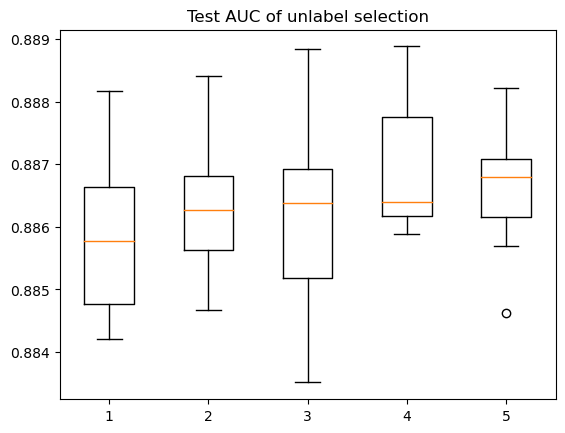

In [12]:
fig1, ax1 = plt.subplots()
ax1.set_title('Test AUC of unlabel samples selection to be included in the DeepOCC prediction model')
ax1.boxplot(df_auc_iso_test)

# unlabeled samples drop method 80% labeled

In [72]:
simulation = 'unlabeled data selection - old before fixes/'
experiments = ['80_per_labeled_baseline_5_unlabeled_random_method_5','80_per_labeled_baseline_5_unlabeled_isolation_method_4']


In [73]:
#all data train, test and validation
df_auc_enhanced_model = pd.DataFrame(index=np.arange(10))
for i in range(len(experiments)):
    exact_path = file_path + simulation + experiments[i] + '/results.json'
    file1 = open(exact_path, 'r')
    Lines = file1.readlines()
    #display(i)
    arr = Lines[0].split('}')
    #display(arr)
    dict_auc = {'train_auc_' + experiments[i]:[],
            'validation_auc_' + experiments[i]:[],
            'test_auc_' + experiments[i]:[]
            }
    for line in arr:
        split_lines = line.split(', ')
        for sl in split_lines:
            if 'train_auc' in sl:
                dict_auc['train_auc_' + experiments[i]].append(float(sl.split(': ')[1]))
            if 'validation_auc' in sl:
                dict_auc['validation_auc_' + experiments[i]].append(float(sl.split(': ')[1]))
            if 'test_auc' in sl:
                dict_auc['test_auc_' + experiments[i]].append(float(sl.split(': ')[1]))            
    file1.close()
    df_auc = pd.DataFrame(dict_auc)
    df_auc_enhanced_model = df_auc_enhanced_model.join(df_auc)

0

['{"train_time": 628.9807531833649, "train_auc": 0.9068530121300913, "train_ratios": null, "test_auc": 0.8902992775537723, "test_time": 0.20536518096923828, "test_scores": null, "test_raios": null, "validation_auc": 0.8863578861453588, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 650.5649681091309, "train_auc": 0.906043802382085, "train_ratios": null, "test_auc": 0.8931126218289205, "test_time": 0.195404052734375, "test_scores": null, "test_raios": null, "validation_auc": 0.8884600407020541, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 1280.2150979042053, "train_auc": 0.9054025514077156, "train_ratios": null, "test_auc": 0.8912364922607172, "test_time": 0.18810582160949707, "test_scores": null, "test_raios": null, "validation_auc": 0.8863409562236872, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 640.315160036087, "train_auc": 0.9069166

1

['{"train_time": 13726.69106388092, "train_auc": 0.9081079806530911, "train_ratios": null, "test_auc": 0.8906745289299426, "test_time": 0.1791248321533203, "test_scores": null, "test_raios": null, "validation_auc": 0.8879863727300921, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 667.8902628421783, "train_auc": 0.9074529864092904, "train_ratios": null, "test_auc": 0.889766004658582, "test_time": 0.1887202262878418, "test_scores": null, "test_raios": null, "validation_auc": 0.8867665376838824, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 978.7280881404877, "train_auc": 0.9079346227698878, "train_ratios": null, "test_auc": 0.891152569354891, "test_time": 0.18662095069885254, "test_scores": null, "test_raios": null, "validation_auc": 0.8862986779814489, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 655.0189499855042, "train_auc": 0.90702611

In [74]:
df_auc_enhanced_model.mean(axis=0)

train_auc_80_per_labeled_baseline_5_unlabeled_random_method_5            0.906835
validation_auc_80_per_labeled_baseline_5_unlabeled_random_method_5       0.886994
test_auc_80_per_labeled_baseline_5_unlabeled_random_method_5             0.891754
train_auc_80_per_labeled_baseline_5_unlabeled_isolation_method_4         0.907699
validation_auc_80_per_labeled_baseline_5_unlabeled_isolation_method_4    0.886649
test_auc_80_per_labeled_baseline_5_unlabeled_isolation_method_4          0.891190
dtype: float64

# deepocc enhancements evaluation

In [44]:
simulation = 'deepsad to deepocc/'
experiments = ['5_per_labeled_5_unlabeled_method_3','5_per_labeled_5_unlabeled_balanced_exclude_loss_method_6','5_per_labeled_5_unlabeled_exclude_balance_loss_method_6']

In [45]:
#all data train, test and validation
df_auc_enhanced_model = pd.DataFrame(index=np.arange(10))
for i in range(len(experiments)):
    exact_path = file_path + simulation + experiments[i] + '/results.json'
    file1 = open(exact_path, 'r')
    Lines = file1.readlines()
    #display(i)
    arr = Lines[0].split('}')
    #display(arr)
    dict_auc = {'train_auc_' + experiments[i]:[],
            'validation_auc_' + experiments[i]:[],
            'test_auc_' + experiments[i]:[]
            }
    for line in arr:
        split_lines = line.split(', ')
        for sl in split_lines:
            if 'train_auc' in sl:
                dict_auc['train_auc_' + experiments[i]].append(float(sl.split(': ')[1]))
            if 'validation_auc' in sl:
                dict_auc['validation_auc_' + experiments[i]].append(float(sl.split(': ')[1]))
            if 'test_auc' in sl:
                dict_auc['test_auc_' + experiments[i]].append(float(sl.split(': ')[1]))            
    file1.close()
    df_auc = pd.DataFrame(dict_auc)
    df_auc_enhanced_model = df_auc_enhanced_model.join(df_auc)

0

['{"train_time": 96.47420811653137, "train_auc": 0.9236011826343453, "train_ratios": null, "test_auc": 0.8633255124466679, "test_time": 0.20284008979797363, "test_scores": null, "test_raios": null, "validation_auc": 0.8596649897627586, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 94.88988304138184, "train_auc": 0.9213506415165568, "train_ratios": null, "test_auc": 0.8501530191929121, "test_time": 0.18663668632507324, "test_scores": null, "test_raios": null, "validation_auc": 0.852099403411165, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 96.45630693435669, "train_auc": 0.9232517819330438, "train_ratios": null, "test_auc": 0.8676848062434123, "test_time": 0.19284296035766602, "test_scores": null, "test_raios": null, "validation_auc": 0.8643714521131457, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 96.45501708984375, "train_auc": 0.92040

1

['{"train_time": 188.4264941215515, "train_auc": 0.9360670204388183, "train_ratios": null, "test_auc": 0.8579819751814605, "test_time": 0.3642899990081787, "test_scores": null, "test_raios": null, "validation_auc": 0.8553953396126855, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 188.06990003585815, "train_auc": 0.9317879268706208, "train_ratios": null, "test_auc": 0.8419927134728078, "test_time": 0.46262383460998535, "test_scores": null, "test_raios": null, "validation_auc": 0.8432970999839721, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 197.12656831741333, "train_auc": 0.9262219328911485, "train_ratios": null, "test_auc": 0.853982172516064, "test_time": 0.5861871242523193, "test_scores": null, "test_raios": null, "validation_auc": 0.8512434060309793, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 190.1793007850647, "train_auc": 0.93334

2

['{"train_time": 180.2931981086731, "train_auc": 0.5757839668545546, "train_ratios": null, "test_auc": 0.4971114988252756, "test_time": 0.3842458724975586, "test_scores": null, "test_raios": null, "validation_auc": 0.4914520285361373, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 185.26691484451294, "train_auc": 0.5706739839508145, "train_ratios": null, "test_auc": 0.5022863415278471, "test_time": 0.3791208267211914, "test_scores": null, "test_raios": null, "validation_auc": 0.48360583864387785, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 187.77424836158752, "train_auc": 0.5832100141856307, "train_ratios": null, "test_auc": 0.47869304814593006, "test_time": 0.3898608684539795, "test_scores": null, "test_raios": null, "validation_auc": 0.46484459859137095, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 182.1881721019745, "train_auc": 0.57

In [46]:
df_auc_enhanced_model.mean(axis=0)

train_auc_5_per_labeled_5_unlabeled_method_3                               0.926369
validation_auc_5_per_labeled_5_unlabeled_method_3                          0.858172
test_auc_5_per_labeled_5_unlabeled_method_3                                0.861059
train_auc_5_per_labeled_5_unlabeled_balanced_exclude_loss_method_6         0.930188
validation_auc_5_per_labeled_5_unlabeled_balanced_exclude_loss_method_6    0.848978
test_auc_5_per_labeled_5_unlabeled_balanced_exclude_loss_method_6          0.850019
train_auc_5_per_labeled_5_unlabeled_exclude_balance_loss_method_6          0.578003
validation_auc_5_per_labeled_5_unlabeled_exclude_balance_loss_method_6     0.481771
test_auc_5_per_labeled_5_unlabeled_exclude_balance_loss_method_6           0.489860
dtype: float64

In [47]:
df_auc_enhanced_model.std(axis=0)

train_auc_5_per_labeled_5_unlabeled_method_3                               0.004129
validation_auc_5_per_labeled_5_unlabeled_method_3                          0.004275
test_auc_5_per_labeled_5_unlabeled_method_3                                0.005954
train_auc_5_per_labeled_5_unlabeled_balanced_exclude_loss_method_6         0.004862
validation_auc_5_per_labeled_5_unlabeled_balanced_exclude_loss_method_6    0.005438
test_auc_5_per_labeled_5_unlabeled_balanced_exclude_loss_method_6          0.007090
train_auc_5_per_labeled_5_unlabeled_exclude_balance_loss_method_6          0.007705
validation_auc_5_per_labeled_5_unlabeled_exclude_balance_loss_method_6     0.010334
test_auc_5_per_labeled_5_unlabeled_exclude_balance_loss_method_6           0.008994
dtype: float64

In [48]:
# only test results
df_auc_enhanced_model_test = pd.DataFrame(index=np.arange(10))
for i in range(len(experiments)):
    exact_path = file_path + simulation + experiments[i] + '/results.json'
    file1 = open(exact_path, 'r')
    Lines = file1.readlines()
    arr = Lines[0].split('}')
    dict_auc = {
            'test_auc_' + experiments[i]:[]
            }
    for line in arr:
        split_lines = line.split(', ')
        for sl in split_lines:
            if 'test_auc' in sl:
                dict_auc['test_auc_' + experiments[i]].append(float(sl.split(': ')[1]))         
    file1.close()
    df_auc = pd.DataFrame(dict_auc)
    df_auc_enhanced_model_test = df_auc_enhanced_model_test.join(df_auc)
df_auc_enhanced_model_test

,test_auc_5_per_labeled_5_unlabeled_method_3,test_auc_5_per_labeled_5_unlabeled_balanced_exclude_loss_method_6,test_auc_5_per_labeled_5_unlabeled_exclude_balance_loss_method_6
0,0.863326,0.857982,0.497111
1,0.850153,0.841993,0.502286
2,0.867685,0.853982,0.478693
3,0.859020,0.850067,0.477126
4,0.866185,0.856339,0.480573
5,0.853498,0.835785,0.495585
6,0.867505,0.847521,0.499260
7,0.864890,0.848938,0.485164
8,0.859317,0.849896,0.491172
9,0.859012,0.857692,0.491624


In [49]:
group5 = df_auc_enhanced_model_test['test_auc_5_per_labeled_5_unlabeled_method_3']
group6 = df_auc_enhanced_model_test['test_auc_5_per_labeled_5_unlabeled_balanced_exclude_loss_method_6']
group7 = df_auc_enhanced_model_test['test_auc_5_per_labeled_5_unlabeled_exclude_balance_loss_method_6']

# conduct the Wilcoxon-Signed Rank Test
print(stats.wilcoxon(group6, group5))
print(stats.wilcoxon(group6, group7))

WilcoxonResult(statistic=0.0, pvalue=0.001953125)
WilcoxonResult(statistic=0.0, pvalue=0.001953125)


{'whiskers': [<matplotlib.lines.Line2D at 0x125241c10>,
 'caps': [<matplotlib.lines.Line2D at 0x12524e190>,
 'boxes': [<matplotlib.lines.Line2D at 0x125241970>,
 'medians': [<matplotlib.lines.Line2D at 0x12524e6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x12524e970>,
 'means': []}

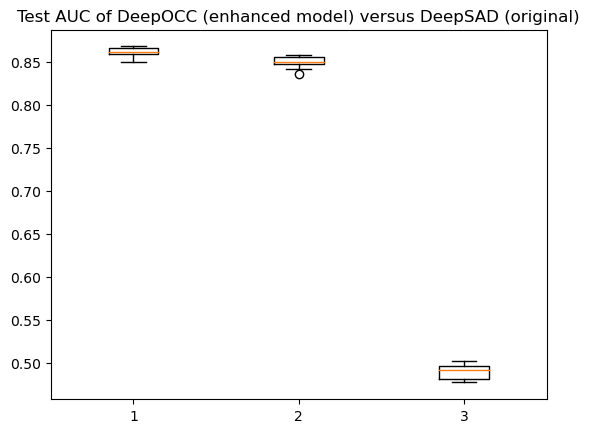

In [45]:
fig1, ax1 = plt.subplots()
ax1.set_title('Test AUC of DeepOCC (enhanced model) versus DeepSAD (original)')
ax1.boxplot(df_auc_enhanced_model_test)

# smote multiplier evaluation

In [66]:
simulation = 'smote multiplier/'
experiments = ['5_per_labeled_5_unlabeled_smote_m1_method_6','5_per_labeled_5_unlabeled_smote_m1.5_method_6','5_per_labeled_5_unlabeled_smote_m4_method_3','5_per_labeled_5_unlabeled_smote_m6_method_6','5_per_labeled_5_unlabeled_smote_m8_method_6']

In [67]:
#all data train, test and validation
df_auc_enhanced_model = pd.DataFrame(index=np.arange(10))
for i in range(len(experiments)):
    exact_path = file_path + simulation + experiments[i] + '/results.json'
    file1 = open(exact_path, 'r')
    Lines = file1.readlines()
    display(i)
    arr = Lines[0].split('}')
    display(arr)
    dict_auc = {'train_auc_' + experiments[i]:[],
            'validation_auc_' + experiments[i]:[],
            'test_auc_' + experiments[i]:[]
            }
    for line in arr:
        split_lines = line.split(', ')
        for sl in split_lines:
            if 'train_auc' in sl:
                dict_auc['train_auc_' + experiments[i]].append(float(sl.split(': ')[1]))
            if 'validation_auc' in sl:
                dict_auc['validation_auc_' + experiments[i]].append(float(sl.split(': ')[1]))
            if 'test_auc' in sl:
                dict_auc['test_auc_' + experiments[i]].append(float(sl.split(': ')[1]))            
    file1.close()
    df_auc = pd.DataFrame(dict_auc)
    df_auc_enhanced_model = df_auc_enhanced_model.join(df_auc)

0

['{"train_time": 28.123379230499268, "train_auc": 0.8917279758958219, "train_ratios": null, "test_auc": 0.8585588234826057, "test_time": 0.1849510669708252, "test_scores": null, "test_raios": null, "validation_auc": 0.8567489298203528, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 28.026215076446533, "train_auc": 0.891976231303641, "train_ratios": null, "test_auc": 0.8553339835119512, "test_time": 0.18672919273376465, "test_scores": null, "test_raios": null, "validation_auc": 0.8508013123762384, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 28.433758020401, "train_auc": 0.8847802085099707, "train_ratios": null, "test_auc": 0.8663103946002463, "test_time": 0.20513510704040527, "test_scores": null, "test_raios": null, "validation_auc": 0.8619380159994278, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 28.799360036849976, "train_auc": 0.89771

1

['{"train_time": 28.845435857772827, "train_auc": 0.890961945562974, "train_ratios": null, "test_auc": 0.8624794615523761, "test_time": 0.20440125465393066, "test_scores": null, "test_raios": null, "validation_auc": 0.8592963336010335, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 28.390374898910522, "train_auc": 0.8950259641685987, "train_ratios": null, "test_auc": 0.857017539439071, "test_time": 0.19691705703735352, "test_scores": null, "test_raios": null, "validation_auc": 0.8552490180485789, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 153.60007119178772, "train_auc": 0.9009234495322237, "train_ratios": null, "test_auc": 0.8727940272332362, "test_time": 0.21466326713562012, "test_scores": null, "test_raios": null, "validation_auc": 0.8659017941087386, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 29.51175284385681, "train_auc": 0.893

2

['{"train_time": 29.326417922973633, "train_auc": 0.8951605720078402, "train_ratios": null, "test_auc": 0.8655613824668205, "test_time": 0.18597078323364258, "test_scores": null, "test_raios": null, "validation_auc": 0.8604587298370832, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 30.067753076553345, "train_auc": 0.9086617609420072, "train_ratios": null, "test_auc": 0.8605674722551262, "test_time": 0.20526599884033203, "test_scores": null, "test_raios": null, "validation_auc": 0.8605960689376406, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 29.86693811416626, "train_auc": 0.8764203253358719, "train_ratios": null, "test_auc": 0.8583316897624188, "test_time": 0.2061767578125, "test_scores": null, "test_raios": null, "validation_auc": 0.8544185020230765, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 29.10867214202881, "train_auc": 0.900278

3

['{"train_time": 28.31515121459961, "train_auc": 0.8801558667798527, "train_ratios": null, "test_auc": 0.8539721572544603, "test_time": 0.1845400333404541, "test_scores": null, "test_raios": null, "validation_auc": 0.8479176701873524, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 37.97456502914429, "train_auc": 0.8988075874472586, "train_ratios": null, "test_auc": 0.8534223761526437, "test_time": 0.22276926040649414, "test_scores": null, "test_raios": null, "validation_auc": 0.8497728069964452, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 39.04182410240173, "train_auc": 0.8983364793160541, "train_ratios": null, "test_auc": 0.8710435287246507, "test_time": 0.3088200092315674, "test_scores": null, "test_raios": null, "validation_auc": 0.865150031619549, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 37.72711229324341, "train_auc": 0.9018442

4

['{"train_time": 31.569971799850464, "train_auc": 0.8917315790724851, "train_ratios": null, "test_auc": 0.8606624819706725, "test_time": 0.19238805770874023, "test_scores": null, "test_raios": null, "validation_auc": 0.8587514498058022, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 31.315152883529663, "train_auc": 0.9054218987915665, "train_ratios": null, "test_auc": 0.8582093635269422, "test_time": 0.19011688232421875, "test_scores": null, "test_raios": null, "validation_auc": 0.8559274947036458, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 31.254364013671875, "train_auc": 0.9084407937180267, "train_ratios": null, "test_auc": 0.8709592610137376, "test_time": 0.19057321548461914, "test_scores": null, "test_raios": null, "validation_auc": 0.8653388522625272, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 31.98590087890625, "train_auc": 0.9

In [68]:
df_auc_enhanced_model.mean(axis=0)

train_auc_5_per_labeled_5_unlabeled_smote_m1_method_6           0.887793
validation_auc_5_per_labeled_5_unlabeled_smote_m1_method_6      0.859443
test_auc_5_per_labeled_5_unlabeled_smote_m1_method_6            0.863780
train_auc_5_per_labeled_5_unlabeled_smote_m1.5_method_6         0.893270
validation_auc_5_per_labeled_5_unlabeled_smote_m1.5_method_6    0.860601
test_auc_5_per_labeled_5_unlabeled_smote_m1.5_method_6          0.864585
train_auc_5_per_labeled_5_unlabeled_smote_m4_method_3           0.901462
validation_auc_5_per_labeled_5_unlabeled_smote_m4_method_3      0.860193
test_auc_5_per_labeled_5_unlabeled_smote_m4_method_3            0.864133
train_auc_5_per_labeled_5_unlabeled_smote_m6_method_6           0.901635
validation_auc_5_per_labeled_5_unlabeled_smote_m6_method_6      0.856303
test_auc_5_per_labeled_5_unlabeled_smote_m6_method_6            0.859923
train_auc_5_per_labeled_5_unlabeled_smote_m8_method_6           0.908302
validation_auc_5_per_labeled_5_unlabeled_smote_m8_m

In [69]:
df_auc_enhanced_model.std(axis=0)

train_auc_5_per_labeled_5_unlabeled_smote_m1_method_6           0.007053
validation_auc_5_per_labeled_5_unlabeled_smote_m1_method_6      0.005458
test_auc_5_per_labeled_5_unlabeled_smote_m1_method_6            0.005219
train_auc_5_per_labeled_5_unlabeled_smote_m1.5_method_6         0.005700
validation_auc_5_per_labeled_5_unlabeled_smote_m1.5_method_6    0.003876
test_auc_5_per_labeled_5_unlabeled_smote_m1.5_method_6          0.004278
train_auc_5_per_labeled_5_unlabeled_smote_m4_method_3           0.010125
validation_auc_5_per_labeled_5_unlabeled_smote_m4_method_3      0.006596
test_auc_5_per_labeled_5_unlabeled_smote_m4_method_3            0.006398
train_auc_5_per_labeled_5_unlabeled_smote_m6_method_6           0.009168
validation_auc_5_per_labeled_5_unlabeled_smote_m6_method_6      0.008820
test_auc_5_per_labeled_5_unlabeled_smote_m6_method_6            0.008977
train_auc_5_per_labeled_5_unlabeled_smote_m8_method_6           0.008000
validation_auc_5_per_labeled_5_unlabeled_smote_m8_m

In [ ]:
### smote multiplier evaluation - excluding balanced batches

In [51]:
simulation = 'smote multiplier excluding balanced batch/'
experiments = ['5_per_labeled_5_unlabeled_smote_m1_exc_balanced_batch_method_6','5_per_labeled_5_unlabeled_smote_m2_exc_balanced_batch_method_6','5_per_labeled_5_unlabeled_smote_m4_exc_balanced_batch_method_6','5_per_labeled_5_unlabeled_smote_m8_exc_balanced_batch_method_6']

In [52]:
#all data train, test and validation
df_auc_enhanced_model = pd.DataFrame(index=np.arange(3))
for i in range(len(experiments)):
    exact_path = file_path + simulation + experiments[i] + '/results.json'
    file1 = open(exact_path, 'r')
    Lines = file1.readlines()
    display(i)
    arr = Lines[0].split('}')
    display(arr)
    dict_auc = {'train_auc_' + experiments[i]:[],
            'validation_auc_' + experiments[i]:[],
            'test_auc_' + experiments[i]:[]
            }
    for line in arr:
        split_lines = line.split(', ')
        for sl in split_lines:
            if 'train_auc' in sl:
                dict_auc['train_auc_' + experiments[i]].append(float(sl.split(': ')[1]))
            if 'validation_auc' in sl:
                dict_auc['validation_auc_' + experiments[i]].append(float(sl.split(': ')[1]))
            if 'test_auc' in sl:
                dict_auc['test_auc_' + experiments[i]].append(float(sl.split(': ')[1]))            
    file1.close()
    df_auc = pd.DataFrame(dict_auc)
    df_auc_enhanced_model = df_auc_enhanced_model.join(df_auc)

0

['{"train_time": 38.07568693161011, "train_auc": 0.8185601026833418, "train_ratios": null, "test_auc": 0.8552069228373957, "test_time": 0.24338722229003906, "test_scores": null, "test_raios": null, "validation_auc": 0.8498809610725148, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 28.906572103500366, "train_auc": 0.557459697482366, "train_ratios": null, "test_auc": 0.4946122242421317, "test_time": 0.18555212020874023, "test_scores": null, "test_raios": null, "validation_auc": 0.49315960656383945, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 28.051973819732666, "train_auc": 0.5418929859864537, "train_ratios": null, "test_auc": 0.495448811562959, "test_time": 0.1915121078491211, "test_scores": null, "test_raios": null, "validation_auc": 0.48577620245280856, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 28.21249485015869, "train_auc": 0.555

1

['{"train_time": 28.42910408973694, "train_auc": 0.8477048710200392, "train_ratios": null, "test_auc": 0.8601000438698164, "test_time": 0.19492197036743164, "test_scores": null, "test_raios": null, "validation_auc": 0.854329001990829, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 28.25607967376709, "train_auc": 0.8478407240350898, "train_ratios": null, "test_auc": 0.8551100273032581, "test_time": 0.19017791748046875, "test_scores": null, "test_raios": null, "validation_auc": 0.8525565778133577, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 28.93914270401001, "train_auc": 0.840738713322542, "train_ratios": null, "test_auc": 0.8663890287265075, "test_time": 0.2027897834777832, "test_scores": null, "test_raios": null, "validation_auc": 0.855445924505161, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '']

2

['{"train_time": 29.319823741912842, "train_auc": 0.8671283374964406, "train_ratios": null, "test_auc": 0.8658805446647249, "test_time": 0.18776798248291016, "test_scores": null, "test_raios": null, "validation_auc": 0.8594407820447791, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 29.84193205833435, "train_auc": 0.8800640794872207, "train_ratios": null, "test_auc": 0.8639284227076959, "test_time": 0.19841408729553223, "test_scores": null, "test_raios": null, "validation_auc": 0.8611657210246905, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 29.496056079864502, "train_auc": 0.86002388301125, "train_ratios": null, "test_auc": 0.8609376125589683, "test_time": 0.19389009475708008, "test_scores": null, "test_raios": null, "validation_auc": 0.8580188974430417, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '']

3

['{"train_time": 39.247546672821045, "train_auc": 0.8957115507573601, "train_ratios": null, "test_auc": 0.8635211522006787, "test_time": 0.23952794075012207, "test_scores": null, "test_raios": null, "validation_auc": 0.8611443903344435, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 39.46287989616394, "train_auc": 0.8893007404475609, "train_ratios": null, "test_auc": 0.8741060954643277, "test_time": 0.20831894874572754, "test_scores": null, "test_raios": null, "validation_auc": 0.8643853249108193, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 38.93747282028198, "train_auc": 0.902230490582675, "train_ratios": null, "test_auc": 0.8709100254996625, "test_time": 0.2361431121826172, "test_scores": null, "test_raios": null, "validation_auc": 0.8663912479089698, "validation_time": null, "validation_scores": null, "validation_raios": null',
 '{"train_time": 38.97122406959534, "train_auc": 0.89498

In [53]:
df_auc_enhanced_model.mean(axis=0)

train_auc_5_per_labeled_5_unlabeled_smote_m1_exc_balanced_batch_method_6         0.639304
validation_auc_5_per_labeled_5_unlabeled_smote_m1_exc_balanced_batch_method_6    0.609606
test_auc_5_per_labeled_5_unlabeled_smote_m1_exc_balanced_batch_method_6          0.615089
train_auc_5_per_labeled_5_unlabeled_smote_m2_exc_balanced_batch_method_6         0.845428
validation_auc_5_per_labeled_5_unlabeled_smote_m2_exc_balanced_batch_method_6    0.854111
test_auc_5_per_labeled_5_unlabeled_smote_m2_exc_balanced_batch_method_6          0.860533
train_auc_5_per_labeled_5_unlabeled_smote_m4_exc_balanced_batch_method_6         0.869072
validation_auc_5_per_labeled_5_unlabeled_smote_m4_exc_balanced_batch_method_6    0.859542
test_auc_5_per_labeled_5_unlabeled_smote_m4_exc_balanced_batch_method_6          0.863582
train_auc_5_per_labeled_5_unlabeled_smote_m8_exc_balanced_batch_method_6         0.895748
validation_auc_5_per_labeled_5_unlabeled_smote_m8_exc_balanced_batch_method_6    0.863974
test_auc_5

In [54]:
df_auc_enhanced_model.std(axis=0)

train_auc_5_per_labeled_5_unlabeled_smote_m1_exc_balanced_batch_method_6         0.155435
validation_auc_5_per_labeled_5_unlabeled_smote_m1_exc_balanced_batch_method_6    0.208117
test_auc_5_per_labeled_5_unlabeled_smote_m1_exc_balanced_batch_method_6          0.207948
train_auc_5_per_labeled_5_unlabeled_smote_m2_exc_balanced_batch_method_6         0.004062
validation_auc_5_per_labeled_5_unlabeled_smote_m2_exc_balanced_batch_method_6    0.001457
test_auc_5_per_labeled_5_unlabeled_smote_m2_exc_balanced_batch_method_6          0.005652
train_auc_5_per_labeled_5_unlabeled_smote_m4_exc_balanced_batch_method_6         0.010161
validation_auc_5_per_labeled_5_unlabeled_smote_m4_exc_balanced_batch_method_6    0.001576
test_auc_5_per_labeled_5_unlabeled_smote_m4_exc_balanced_batch_method_6          0.002490
train_auc_5_per_labeled_5_unlabeled_smote_m8_exc_balanced_batch_method_6         0.006465
validation_auc_5_per_labeled_5_unlabeled_smote_m8_exc_balanced_batch_method_6    0.002648
test_auc_5

In [55]:
#paired sample t test
#ttest_rel is from SciPy

In [62]:
df_auc_enhanced_model['test_auc_5_per_labeled_5_unlabeled_smote_m8_exc_balanced_batch_method_6']

0    0.863521
1    0.874106
2    0.870910
Name: test_auc_5_per_labeled_5_unlabeled_smote_m8_exc_balanced_batch_method_6, dtype: float64

In [58]:
#define samples
group5 = df_auc_enhanced_model['test_auc_5_per_labeled_5_unlabeled_smote_m1_exc_balanced_batch_method_6']
group6 = df_auc_enhanced_model['test_auc_5_per_labeled_5_unlabeled_smote_m2_exc_balanced_batch_method_6']
group7 = df_auc_enhanced_model['test_auc_5_per_labeled_5_unlabeled_smote_m4_exc_balanced_batch_method_6']
group8 = df_auc_enhanced_model['test_auc_5_per_labeled_5_unlabeled_smote_m8_exc_balanced_batch_method_6']

# conduct the Wilcoxon-Signed Rank Test
print(stats.wilcoxon(group8, group5))
print(stats.wilcoxon(group6, group7))
print(stats.wilcoxon(group7, group8))

WilcoxonResult(statistic=0.0, pvalue=0.25)
WilcoxonResult(statistic=1.0, pvalue=0.5)
WilcoxonResult(statistic=1.0, pvalue=0.5)


# Other method proprogation/ label spreading/ self learning

In [63]:
#Test results over 3 runs
spreading = [0.832818288249626,0.77281868015471,0.832405103009193]
propogation = [0.832,0.7595,0.826]

print(stats.wilcoxon(spreading, propogation))

WilcoxonResult(statistic=0.0, pvalue=0.25)
